# **COVID 19 Cases Segmentation through K-Means Clustering**

1. Project Objectives | Problem Statements

```
1.1. PO1 | PS1: Identifying High-Risk Regions using Unsupervised Machine Learning Clustering Algorithms

1.2. PO2 | PS2: Identification of Appropriate Number of Segments or Clusters

1.3. PO3 | PS3: Determination of Segment or Cluster Characteristics
```

**2. Description of Data**

2.1. Data Source, Size, Shape

	2.1.1. Data Source (https://www.kaggle.com/datasets/hosammhmdali/covid-19-dataset)

	2.1.2. Data Size (9.03 MB)

	2.1.3. Data Shape (Dimension: Number of Variables-16 | Number of Records-100000 rows × 16 columns)

  **2.2. Description of Variables**

**2.2.1. Index Variable(s)**

Index Variable(s): Row numbers

**.2.2. Variables or Features having Categories | Categorical Variables or Features (CV)**

**2.2.2.1. Variables or Features having Nominal Categories | Categorical
Variables or Features - Nominal Type**

**Nominal Categories:**

1.Fuel

2.Seller Type

3.Transmission

4.Owner


In [ ]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

In [ ]:
df=pd.read_csv("/content/mlm_dataset.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million
0,AFG,Asia,Afghanistan,03-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
1,AFG,Asia,Afghanistan,04-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
2,AFG,Asia,Afghanistan,05-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
3,AFG,Asia,Afghanistan,06-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4,AFG,Asia,Afghanistan,07-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,FLK,South America,Falkland Islands,14-05-2021,60.0,0.0,0.0,NaN,0.0,0.0,15785.32,0.0,0.0,NaN,0.0,0.0
99995,FLK,South America,Falkland Islands,15-05-2021,60.0,0.0,0.0,NaN,0.0,0.0,15785.32,0.0,0.0,NaN,0.0,0.0
99996,FLK,South America,Falkland Islands,16-05-2021,60.0,0.0,0.0,NaN,0.0,0.0,15785.32,0.0,0.0,NaN,0.0,0.0
99997,FLK,South America,Falkland Islands,17-05-2021,60.0,0.0,0.0,NaN,0.0,0.0,15785.32,0.0,0.0,NaN,0.0,0.0


In [ ]:
df_cat = df[['iso_code', 'continent', 'location', 'date']] # Categorical Data [Nominal | Ordinal]
df_noncat = df[['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']] # Non-Categorical Data

In [ ]:
print(df.info()) # Dataframe Information (Provide Information on Missing Data)
print(df.describe())
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information
print(variable_missing_data)
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)
print(record_missing_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         99999 non-null  object 
 1   continent                        94540 non-null  object 
 2   location                         99999 non-null  object 
 3   date                             99999 non-null  object 
 4   total_cases                      92866 non-null  float64
 5   new_cases                        98689 non-null  float64
 6   new_cases_smoothed               98319 non-null  float64
 7   total_deaths                     88381 non-null  float64
 8   new_deaths                       98701 non-null  float64
 9   new_deaths_smoothed              98336 non-null  float64
 10  total_cases_per_million          92866 non-null  float64
 11  new_cases_per_million            98689 non-null  float64
 12  new_cases_smoothed

In [ ]:
# 1.2.1. Impute Missing Categorical Data [Nominal | Ordinal] using Descriptive Satatistics : Central Tendency (Mode)


# Dataset Used : df_cat

si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
df_cat_mdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   iso_code   99999 non-null  object
 1   continent  99999 non-null  object
 2   location   99999 non-null  object
 3   date       99999 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


In [ ]:
# 1.2.2.1. Impute Missing Non-Categorical Data using Descriptive Statistics : Central Tendency
# --------------------------------------------------------------------------------------------

# Dataset Used : df_noncat

si_noncat = SimpleImputer(missing_values=np.nan, strategy='mean') # Other Strategy : mean | median | most_frequent | constant
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi_si # Missing Non-Categorical Data Imputed Subset using Simple Imputer
df_noncat_mdi_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_cases                      99999 non-null  float64
 1   new_cases                        99999 non-null  float64
 2   new_cases_smoothed               99999 non-null  float64
 3   total_deaths                     99999 non-null  float64
 4   new_deaths                       99999 non-null  float64
 5   new_deaths_smoothed              99999 non-null  float64
 6   total_cases_per_million          99999 non-null  float64
 7   new_cases_per_million            99999 non-null  float64
 8   new_cases_smoothed_per_million   99999 non-null  float64
 9   total_deaths_per_million         99999 non-null  float64
 10  new_deaths_per_million           99999 non-null  float64
 11  new_deaths_smoothed_per_million  99999 non-null  float64
dtypes: float64(12)
mem

In [ ]:
#Numeric Encoding of Categorical Data [Nominal & Ordinal]
df_cat_mdt_code = df_cat_mdi.copy()
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_mdt_code)
df_cat_code_oe = pd.DataFrame(oe_fit, columns=['iso_code_code', 'continent_code', 'location_code', 'date_code'])
df_cat_mdt_code_oe = df_cat_mdt_code.join(df_cat_code_oe); df_cat_mdt_code_oe # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
df_cat_mdt_code_oe = pd.merge(df_cat_mdt_code, df_cat_code_oe, left_index=True, right_index=True);
df_cat_mdt_code_oe

,iso_code,continent,location,date,iso_code_code,continent_code,location_code,date_code
0,AFG,Asia,Afghanistan,03-01-2020,1.0,1.0,0.0,90.0
1,AFG,Asia,Afghanistan,04-01-2020,1.0,1.0,0.0,135.0
2,AFG,Asia,Afghanistan,05-01-2020,1.0,1.0,0.0,180.0
3,AFG,Asia,Afghanistan,06-01-2020,1.0,1.0,0.0,225.0
4,AFG,Asia,Afghanistan,07-01-2020,1.0,1.0,0.0,270.0
...,...,...,...,...,...,...,...,...
99994,FLK,South America,Falkland Islands,14-05-2021,60.0,5.0,73.0,602.0
99995,FLK,South America,Falkland Islands,15-05-2021,60.0,5.0,73.0,647.0
99996,FLK,South America,Falkland Islands,16-05-2021,60.0,5.0,73.0,692.0
99997,FLK,South America,Falkland Islands,17-05-2021,60.0,5.0,73.0,737.0


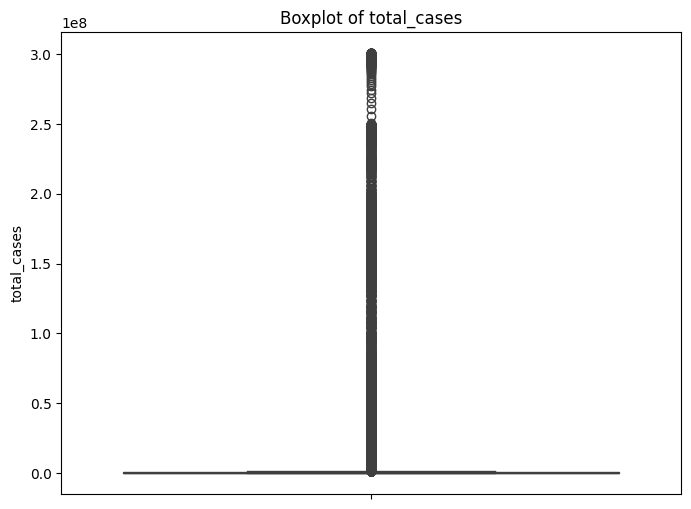

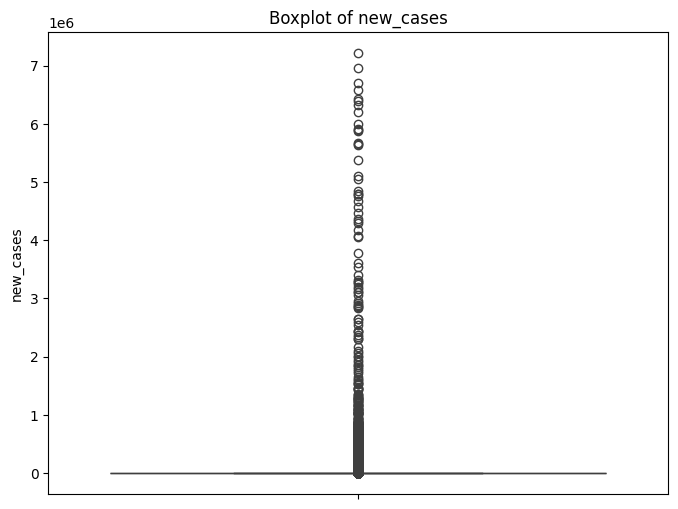

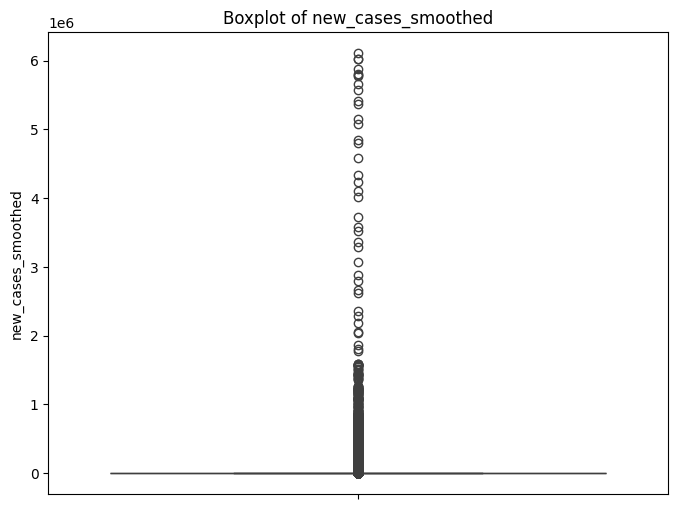

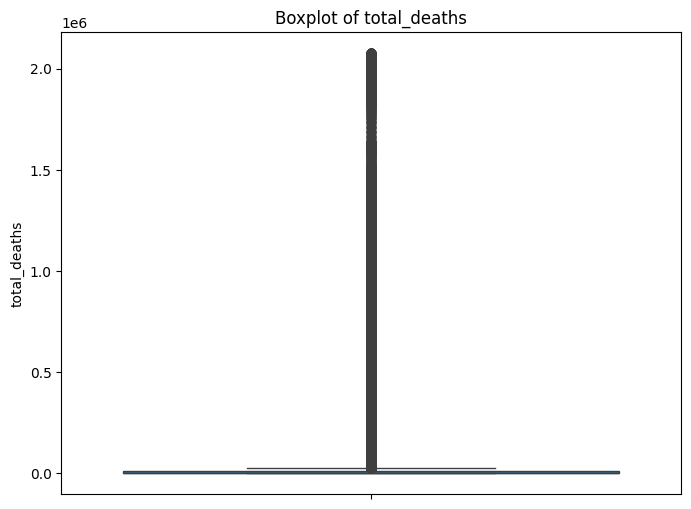

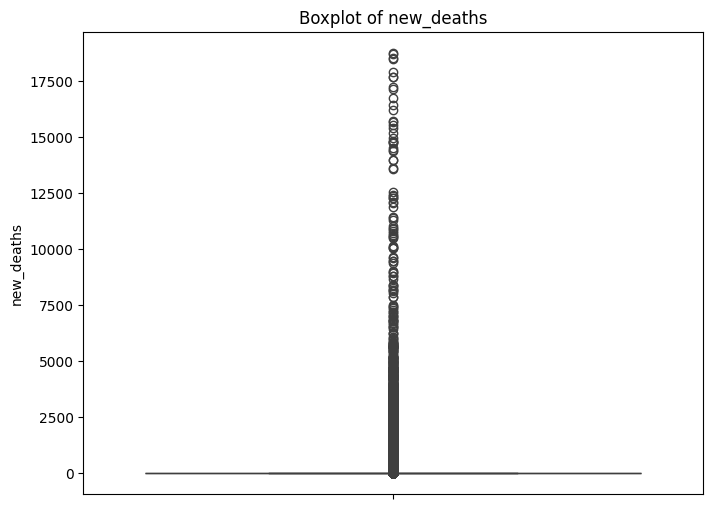

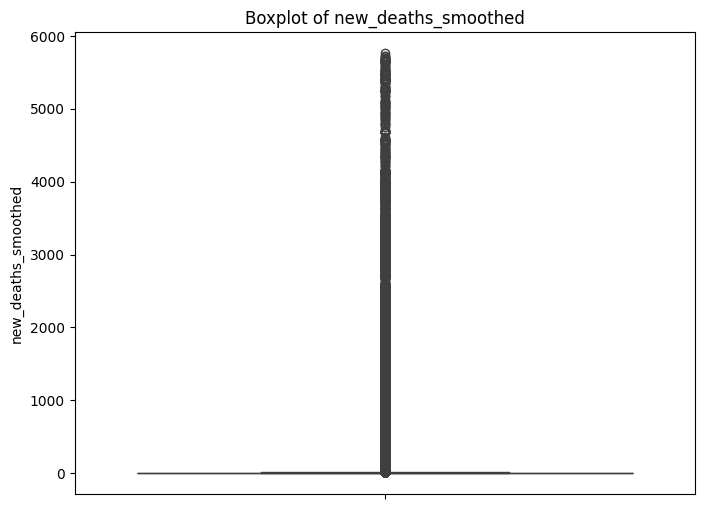

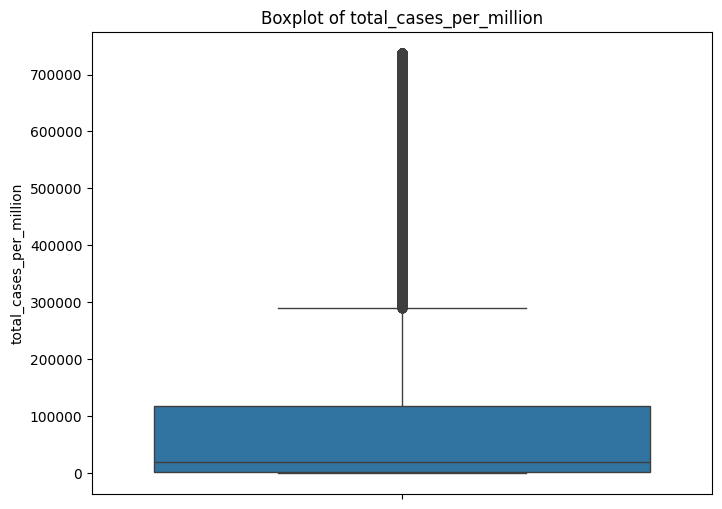

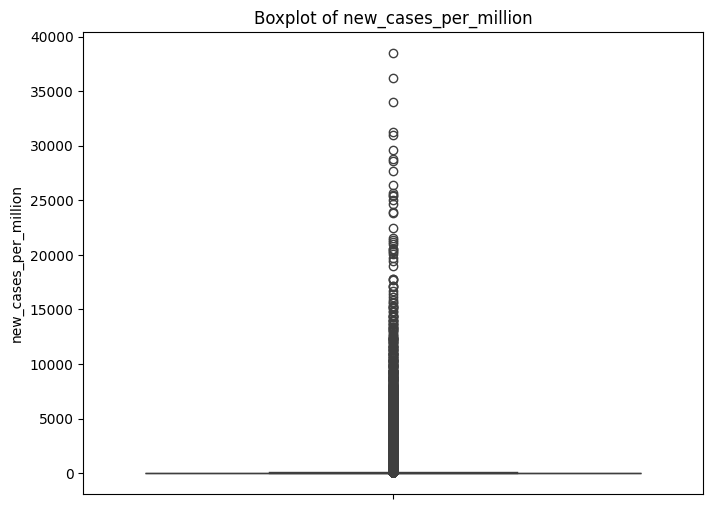

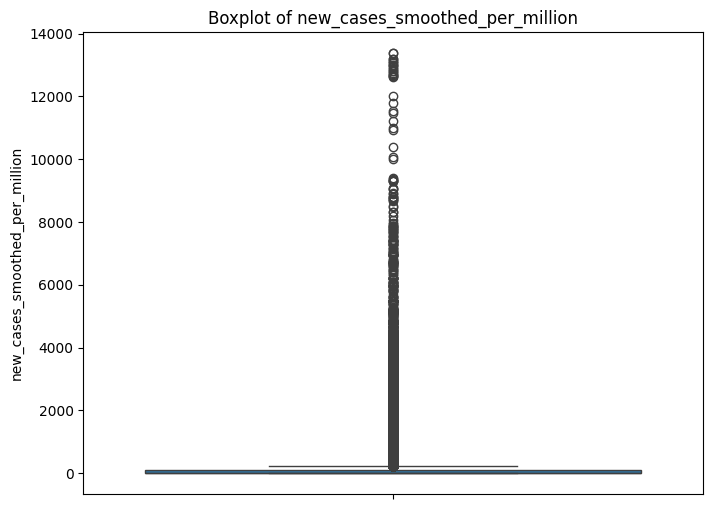

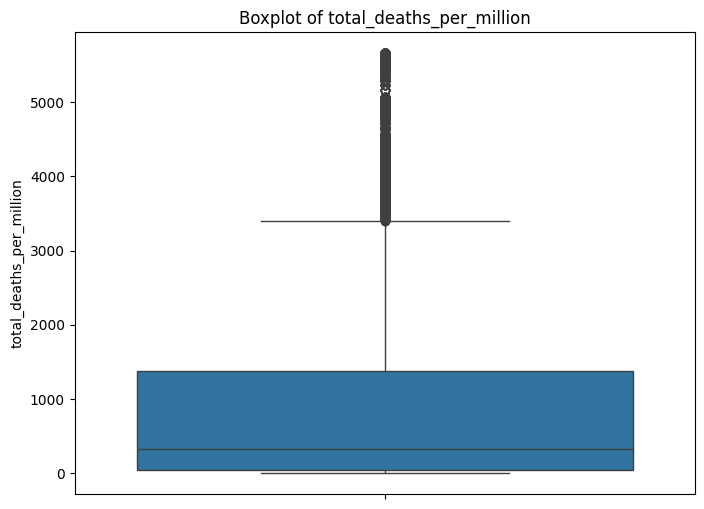

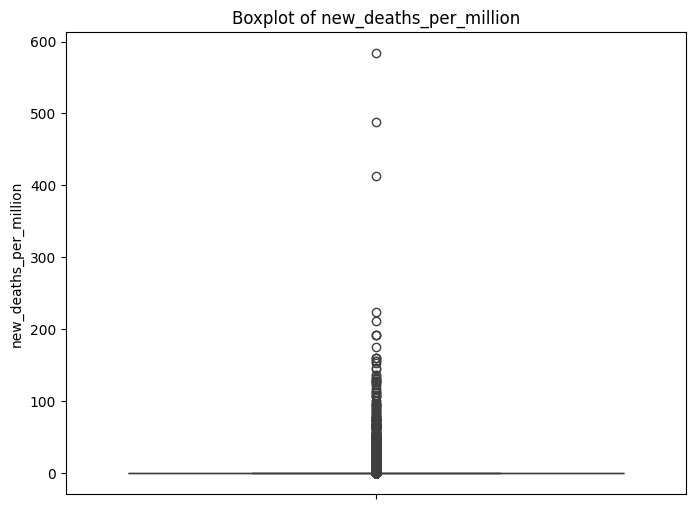

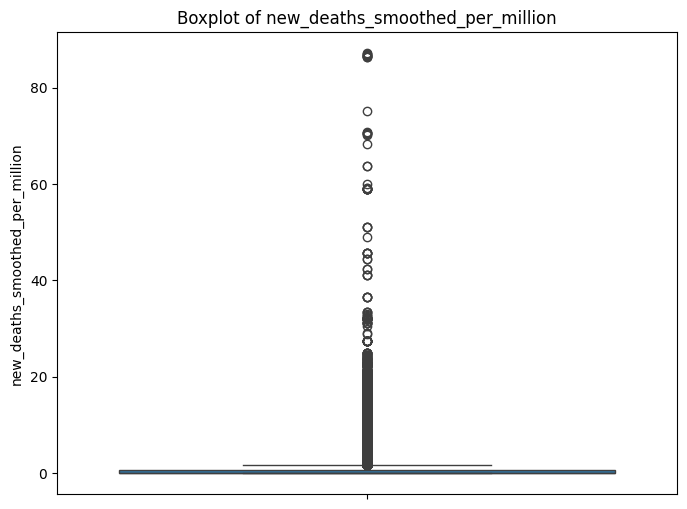

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df_noncat = df[['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']] # Non-Categorical Data

# Create vertical boxplot for 'total_cases'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['total_cases'])
plt.title('Boxplot of total_cases')
plt.ylabel('total_cases')
plt.show()

# Create vertical boxplot for 'new_cases'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['new_cases'])
plt.title('Boxplot of new_cases')
plt.ylabel('new_cases')
plt.show()

# Create vertical boxplot for 'new_cases_smoothed'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['new_cases_smoothed'])
plt.title('Boxplot of new_cases_smoothed')
plt.ylabel('new_cases_smoothed')
plt.show()

# Create vertical boxplot for 'total_deaths'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['total_deaths'])
plt.title('Boxplot of total_deaths')
plt.ylabel('total_deaths')
plt.show()

# Create vertical boxplot for 'new_deaths'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['new_deaths'])
plt.title('Boxplot of new_deaths')
plt.ylabel('new_deaths')
plt.show()

# Create vertical boxplot for 'new_deaths_smoothed'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['new_deaths_smoothed'])
plt.title('Boxplot of new_deaths_smoothed')
plt.ylabel('new_deaths_smoothed')
plt.show()

# Create vertical boxplot for 'total_cases_per_million'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['total_cases_per_million'])
plt.title('Boxplot of total_cases_per_million')
plt.ylabel('total_cases_per_million')
plt.show()

# Create vertical boxplot for 'new_cases_per_million'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['new_cases_per_million'])
plt.title('Boxplot of new_cases_per_million')
plt.ylabel('new_cases_per_million')
plt.show()

# Create vertical boxplot for 'new_cases_smoothed_per_million'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['new_cases_smoothed_per_million'])
plt.title('Boxplot of new_cases_smoothed_per_million')
plt.ylabel('new_cases_smoothed_per_million')
plt.show()

# Create vertical boxplot for 'total_deaths_per_million'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['total_deaths_per_million'])
plt.title('Boxplot of total_deaths_per_million')
plt.ylabel('total_deaths_per_million')
plt.show()

# Create vertical boxplot for 'new_deaths_per_million'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['new_deaths_per_million'])
plt.title('Boxplot of new_deaths_per_million')
plt.ylabel('new_deaths_per_million')
plt.show()

# Create vertical boxplot for 'new_deaths_smoothed_per_million'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['new_deaths_smoothed_per_million'])
plt.title('Boxplot of new_deaths_smoothed_per_million')
plt.ylabel('new_deaths_smoothed_per_million')
plt.show()

In [ ]:
# 3.2.1. Normalization : Min-Max Scaling
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat_mdi_si [['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=['total_cases_mmnorm', 'new_cases_mmnorm', 'new_cases_smoothed_mmnorm', 'total_deaths_mmnorm', 'new_deaths_mmnorm', 'new_deaths_smoothed_mmnorm', 'total_cases_per_million_mmnorm', 'new_cases_per_million_mmnorm', 'new_cases_smoothed_per_million_mmnorm', 'total_deaths_per_million_mmnorm', 'new_deaths_per_million_mmnorm', 'new_deaths_smoothed_per_million_mmnorm']); df_noncat_minmax_norm

#df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=df_noncat_mdt.columns+'_mmnorm'); df_noncat_minmax_norm
#df_noncat_mdt_mmn = df_noncat_mdi_si.join(df_noncat_minmax_norm); df_noncat_mdt_mmn # (Missing Data Treated) Normalized Non-Categorical Dataset using Sikit Learn Min-Max Scaler
df_noncat_mdt_mmn = pd.merge(df_noncat_mdi_si, df_noncat_minmax_norm, left_index=True, right_index=True); df_noncat_mdt_mmn

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,new_cases_smoothed_mmnorm,total_deaths_mmnorm,new_deaths_mmnorm,new_deaths_smoothed_mmnorm,total_cases_per_million_mmnorm,new_cases_per_million_mmnorm,new_cases_smoothed_per_million_mmnorm,total_deaths_per_million_mmnorm,new_deaths_per_million_mmnorm,new_deaths_smoothed_per_million_mmnorm
0,5.936959e+06,0.0,9762.07141,63643.568765,0.0,69.703754,96903.254532,0.0,142.985176,852.305308,...,0.001598,0.03064,0.0,0.012095,0.131385,0.0,0.010691,0.150517,0.0,0.010997
1,5.936959e+06,0.0,9762.07141,63643.568765,0.0,69.703754,96903.254532,0.0,142.985176,852.305308,...,0.001598,0.03064,0.0,0.012095,0.131385,0.0,0.010691,0.150517,0.0,0.010997
2,5.936959e+06,0.0,9762.07141,63643.568765,0.0,69.703754,96903.254532,0.0,142.985176,852.305308,...,0.001598,0.03064,0.0,0.012095,0.131385,0.0,0.010691,0.150517,0.0,0.010997
3,5.936959e+06,0.0,9762.07141,63643.568765,0.0,69.703754,96903.254532,0.0,142.985176,852.305308,...,0.001598,0.03064,0.0,0.012095,0.131385,0.0,0.010691,0.150517,0.0,0.010997
4,5.936959e+06,0.0,9762.07141,63643.568765,0.0,69.703754,96903.254532,0.0,142.985176,852.305308,...,0.001598,0.03064,0.0,0.012095,0.131385,0.0,0.010691,0.150517,0.0,0.010997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6.000000e+01,0.0,0.00000,63643.568765,0.0,0.000000,15785.320000,0.0,0.000000,852.305308,...,0.000000,0.03064,0.0,0.000000,0.021402,0.0,0.000000,0.150517,0.0,0.000000
99995,6.000000e+01,0.0,0.00000,63643.568765,0.0,0.000000,15785.320000,0.0,0.000000,852.305308,...,0.000000,0.03064,0.0,0.000000,0.021402,0.0,0.000000,0.150517,0.0,0.000000
99996,6.000000e+01,0.0,0.00000,63643.568765,0.0,0.000000,15785.320000,0.0,0.000000,852.305308,...,0.000000,0.03064,0.0,0.000000,0.021402,0.0,0.000000,0.150517,0.0,0.000000
99997,6.000000e+01,0.0,0.00000,63643.568765,0.0,0.000000,15785.320000,0.0,0.000000,852.305308,...,0.000000,0.03064,0.0,0.000000,0.021402,0.0,0.000000,0.150517,0.0,0.000000


In [ ]:
# Pre-Processed Dataset

# Using Scikit Learn Ordinal Encoder : df_cat_mdt_code_oe [Superior]

# Missing Data Treated & Transformed or Rescaled Non-Categorical Data Subsets

# Using Scikit Learn Standard Scaler : df_noncat_mdt_std [Standardization]


# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd # Preferred Data Subset

# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_mdt_mmn.copy(); df_noncat_ppd


# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd); df_ppd # Pre-Processed Dataset
df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True); df_ppd

,iso_code,continent,location,date,iso_code_code,continent_code,location_code,date_code,total_cases,new_cases,...,new_cases_smoothed_mmnorm,total_deaths_mmnorm,new_deaths_mmnorm,new_deaths_smoothed_mmnorm,total_cases_per_million_mmnorm,new_cases_per_million_mmnorm,new_cases_smoothed_per_million_mmnorm,total_deaths_per_million_mmnorm,new_deaths_per_million_mmnorm,new_deaths_smoothed_per_million_mmnorm
0,AFG,Asia,Afghanistan,03-01-2020,1.0,1.0,0.0,90.0,5.936959e+06,0.0,...,0.001598,0.03064,0.0,0.012095,0.131385,0.0,0.010691,0.150517,0.0,0.010997
1,AFG,Asia,Afghanistan,04-01-2020,1.0,1.0,0.0,135.0,5.936959e+06,0.0,...,0.001598,0.03064,0.0,0.012095,0.131385,0.0,0.010691,0.150517,0.0,0.010997
2,AFG,Asia,Afghanistan,05-01-2020,1.0,1.0,0.0,180.0,5.936959e+06,0.0,...,0.001598,0.03064,0.0,0.012095,0.131385,0.0,0.010691,0.150517,0.0,0.010997
3,AFG,Asia,Afghanistan,06-01-2020,1.0,1.0,0.0,225.0,5.936959e+06,0.0,...,0.001598,0.03064,0.0,0.012095,0.131385,0.0,0.010691,0.150517,0.0,0.010997
4,AFG,Asia,Afghanistan,07-01-2020,1.0,1.0,0.0,270.0,5.936959e+06,0.0,...,0.001598,0.03064,0.0,0.012095,0.131385,0.0,0.010691,0.150517,0.0,0.010997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,FLK,South America,Falkland Islands,14-05-2021,60.0,5.0,73.0,602.0,6.000000e+01,0.0,...,0.000000,0.03064,0.0,0.000000,0.021402,0.0,0.000000,0.150517,0.0,0.000000
99995,FLK,South America,Falkland Islands,15-05-2021,60.0,5.0,73.0,647.0,6.000000e+01,0.0,...,0.000000,0.03064,0.0,0.000000,0.021402,0.0,0.000000,0.150517,0.0,0.000000
99996,FLK,South America,Falkland Islands,16-05-2021,60.0,5.0,73.0,692.0,6.000000e+01,0.0,...,0.000000,0.03064,0.0,0.000000,0.021402,0.0,0.000000,0.150517,0.0,0.000000
99997,FLK,South America,Falkland Islands,17-05-2021,60.0,5.0,73.0,737.0,6.000000e+01,0.0,...,0.000000,0.03064,0.0,0.000000,0.021402,0.0,0.000000,0.150517,0.0,0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

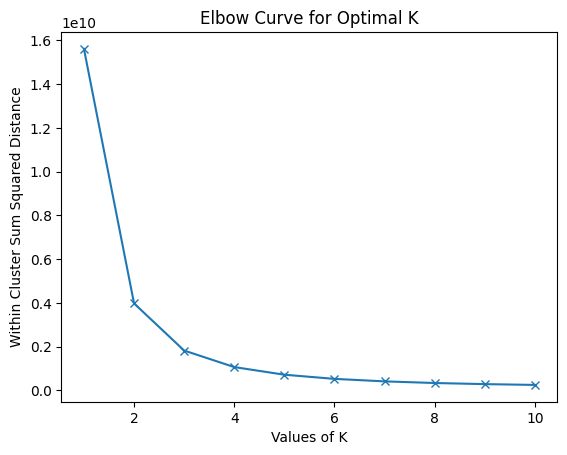

None
KMeans(init='random', n_clusters=2, random_state=222)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 1 1 1]
Silhouette Score for 2 clusters: 0.6166112843125859
Davies-Bouldin Index for 2 clusters: 0.5136044194909865

KMeans(init='random', n_clusters=3, random_state=222)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 ... 1 1 1]
Silhouette Score for 3 clusters: 0.5702211048517893
Davies-Bouldin Index for 3 clusters: 0.5269052484537392

KMeans(init='random', n_clusters=4, random_state=222)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 ... 3 3 3]
Silhouette Score for 4 clusters: 0.5405505117855898
Davies-Bouldin Index for 4 clusters: 0.5432884695784985

KMeans(init='random', n_clusters=5, random_state=222)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 ... 3 3 3]
Silhouette Score for 5 clusters: 0.5171916374109905
Davies-Bouldin Index for 5 clusters: 0.5622377995508522



In [ ]:

#K-Means Clustering


# 2.1.1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia

'''
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
train_new_df=df_ppd[['total_cases_mmnorm', 'new_cases_mmnorm', 'new_cases_smoothed_mmnorm', 'total_deaths_mmnorm', 'new_deaths_mmnorm', 'new_deaths_smoothed_mmnorm', 'total_cases_per_million_mmnorm', 'new_cases_per_million_mmnorm', 'new_cases_smoothed_per_million_mmnorm', 'total_deaths_per_million_mmnorm', 'new_deaths_per_million_mmnorm', 'new_deaths_smoothed_per_million_mmnorm','iso_code_code', 'continent_code', 'location_code', 'date_code']]
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(train_new_df)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
print(plt.show())


cluster_range = [2, 3, 4, 5]

# Iterate over different numbers of clusters
for k in cluster_range:
  # Perform Kmeans Clustering
    km_cluster = kmclus(n_clusters=k, init='random', random_state=222)
    print(km_cluster)
    km_cluster_model = km_cluster.fit_predict(train_new_df);
    print(km_cluster_model)
# Calculate Silhouette Score
    sscore_km_cluster = sscore(train_new_df, km_cluster_model);
    print(f"Silhouette Score for {k} clusters: {sscore_km_cluster}")
    # Calculate Davies-Bouldin Index
    dbscore_km_cluster = dbscore(train_new_df, km_cluster_model)
    print(f"Davies-Bouldin Index for {k} clusters: {dbscore_km_cluster}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Time taken by K-Means for k=4: 2.1191 seconds
Memory used by K-Means for k=4: 2464.36 MB


<ipython-input-48-ec7f93a3a822>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new_df['cluster'] = cluster_labels


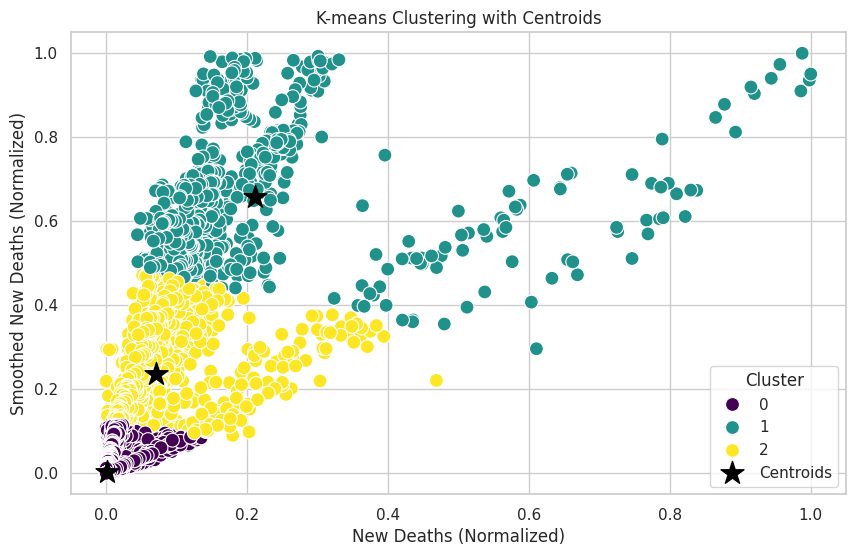

In [ ]:
import time
import psutil
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Start time
start_time = time.time()

# Specify the number of clusters
num_clusters = 3

# Initialize KMeans object
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans clustering model to the data
kmeans.fit(train_new_df[['new_deaths_mmnorm', 'new_deaths_smoothed_mmnorm']])

# End time
end_time = time.time()

# Total time taken
time_taken = end_time - start_time
print("Time taken by K-Means for k=4:", "{:.4f} seconds".format(time_taken))

# Memory used by the KMeans model
memory_used = psutil.Process().memory_info().rss / 1024 / 1024  # Memory in MB
print("Memory used by K-Means for k=4:", "{:.2f} MB".format(memory_used))

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to DataFrame
train_new_df['cluster'] = cluster_labels

# Get centroids of each cluster
centroids = kmeans.cluster_centers_

# Visualize the clusters using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_new_df, x='new_deaths_mmnorm', y='new_deaths_smoothed_mmnorm', hue='cluster', palette='viridis', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='black', label='Centroids')
plt.xlabel('New Deaths (Normalized)')
plt.ylabel('Smoothed New Deaths (Normalized)')
plt.title('K-means Clustering with Centroids')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming train_new_df contains your DataFrame with categorical variables and cluster labels

# Define your categorical variables for analysis
categorical_variables = ['iso_code_code', 'continent_code', 'location_code', 'date_code', 'cluster']

# Create contingency table for each categorical variable and the cluster labels
contingency_tables = {}
for variable in categorical_variables:
    contingency_tables[variable] = pd.crosstab(train_new_df[variable], train_new_df['cluster'])

# Perform Chi-Square Test of Independence for each contingency table
chi2_results = {}
for variable, contingency_table in contingency_tables.items():
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[variable] = {'Chi-Square': chi2, 'P-value': p}

# Display the results
for variable, result in chi2_results.items():
    print(f"Chi-Square Test of Independence for variable '{variable}':")
    print(f"   - Chi-Square Value: {result['Chi-Square']}")
    print(f"   - P-value: {result['P-value']}")


Chi-Square Test of Independence for variable 'iso_code_code':
   - Chi-Square Value: 63585.743258038245
   - P-value: 0.0
Chi-Square Test of Independence for variable 'continent_code':
   - Chi-Square Value: 5102.316481563662
   - P-value: 0.0
Chi-Square Test of Independence for variable 'location_code':
   - Chi-Square Value: 63585.743258038245
   - P-value: 0.0
Chi-Square Test of Independence for variable 'date_code':
   - Chi-Square Value: 3751.7321917406475
   - P-value: 1.5634569421981298e-35
Chi-Square Test of Independence for variable 'cluster':
   - Chi-Square Value: 199998.00000000003
   - P-value: 0.0


In [ ]:
from scipy.stats import f_oneway

# List of features for ANOVA
features = ['total_cases_mmnorm', 'new_cases_mmnorm', 'new_cases_smoothed_mmnorm',
            'total_deaths_mmnorm', 'new_deaths_mmnorm', 'new_deaths_smoothed_mmnorm',
            'total_cases_per_million_mmnorm', 'new_cases_per_million_mmnorm',
            'new_cases_smoothed_per_million_mmnorm', 'total_deaths_per_million_mmnorm',
            'new_deaths_per_million_mmnorm', 'new_deaths_smoothed_per_million_mmnorm']

# Initialize an empty dictionary to store ANOVA results
anova_results = {}

# Iterate over unique cluster labels
for cluster_label in train_new_df['cluster'].unique():
    # Filter dataframe for the current cluster
    cluster_df = train_new_df[train_new_df['cluster'] == cluster_label]

    # Initialize an empty dictionary to store ANOVA results for the current cluster
    cluster_anova_results = {}

    # Perform ANOVA for each feature
    for feature in features:
        # Perform ANOVA test
        anova_result = f_oneway(*[train_new_df[train_new_df['cluster'] == i][feature] for i in train_new_df['cluster'].unique()])
        # Store ANOVA result
        cluster_anova_results[feature] = anova_result

    # Store ANOVA results for the current cluster
    anova_results[cluster_label] = cluster_anova_results

# Print ANOVA results
for cluster_label, cluster_anova_result in anova_results.items():
    print(f"Cluster {cluster_label} ANOVA Results:")
    for feature, result in cluster_anova_result.items():
        print(f"{feature}: F-value = {result.statistic}, p-value = {result.pvalue}")


Cluster 0 ANOVA Results:
total_cases_mmnorm: F-value = 568131.4555168664, p-value = 0.0
new_cases_mmnorm: F-value = 7975.93590411462, p-value = 0.0
new_cases_smoothed_mmnorm: F-value = 11444.017174736398, p-value = 0.0
total_deaths_mmnorm: F-value = 212649.4864368805, p-value = 0.0
new_deaths_mmnorm: F-value = 23524.150031427554, p-value = 0.0
new_deaths_smoothed_mmnorm: F-value = 29918.7969412069, p-value = 0.0
total_cases_per_million_mmnorm: F-value = 855.56412256496, p-value = 0.0
new_cases_per_million_mmnorm: F-value = 84.20628300654225, p-value = 2.886936007978137e-37
new_cases_smoothed_per_million_mmnorm: F-value = 135.0996517831035, p-value = 2.547384191354494e-59
total_deaths_per_million_mmnorm: F-value = 818.0430147830823, p-value = 0.0
new_deaths_per_million_mmnorm: F-value = 176.69937933541868, p-value = 2.4872515442446737e-77
new_deaths_smoothed_per_million_mmnorm: F-value = 155.2850521487612, p-value = 4.624555017967305e-68
Cluster 2 ANOVA Results:
total_cases_mmnorm: F-va

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_ppd_round_kmcluster1 is your DataFrame
variables = ['total_cases_mmnorm', 'new_cases_mmnorm', 'new_cases_smoothed_mmnorm',
                          'total_deaths_mmnorm', 'new_deaths_mmnorm', 'new_deaths_smoothed_mmnorm',
                          'total_cases_per_million_mmnorm', 'new_cases_per_million_mmnorm',
                          'new_cases_smoothed_per_million_mmnorm', 'total_deaths_per_million_mmnorm',
                          'new_deaths_per_million_mmnorm', 'new_deaths_smoothed_per_million_mmnorm',
                          'cluster']

# Create a pairplot for all combinations
sns.pairplot(train_new_df[variables], hue='cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Variables in Different Clusters', y=1.02)
plt.show()


NameError: name 'data_subset_kmcluster' is not defined